In [9]:
### import libraries and load data ###

import torch
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

######################################## Data preparation #########################################

# code from 'aegis4048.github.io', modified for VI and yield

######################################## Data preparation #########################################

# data path
df_path = (
    Path.cwd()
    / "data"
    / "processed"
    / "Jun22_2020"
    / "Jun22_2020_df.csv"
)

df = pd.read_csv(df_path).iloc[:, 2:]
print(df.head().iloc[:,0:4])

# X and y
X = df.iloc[:, 1:].values
y = df['yield'].values

# train test Split (0.7/0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=26, shuffle=True)

# test validate split (0.3 split into 0.15/0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=26, shuffle=True)

# scale features: train the scaler ONLY on the training set. Then use it to scale train/test/val
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train) # trains the scaler using fit on X_train, then transforms X_train as well
X_test = scaler.transform(X_test) # no fit, transforms using data from fit() stored in the scaler
X_val = scaler.transform(X_val)

# convert variables to PyTorch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
print(X_train.shape)

        yield  blue-blue-444  blue-green  blue-green-531
0  641.218827       0.013329   -0.419273       -0.445662
1  697.979880      -0.001042   -0.459447       -0.476955
2  709.891479       0.008540   -0.433216       -0.455423
3  674.191672       0.013697   -0.402593       -0.427173
4  680.430664       0.003195   -0.457388       -0.475037
torch.Size([40, 45])


In [10]:
### model definition ###
in_features = 45
out_features = 1

reg_model = torch.nn.Linear(in_features=in_features, out_features=out_features, bias=True)

# define loss function
mse_loss = torch.nn.MSELoss()

# define optimizer
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.002)

In [13]:
### model training ###
n_epoch = 6000

for i in range(n_epoch):
    # predict model with current reg param
    # forward pass
    y_pred = reg_model(X_train)

    #calc loss
    step_loss = mse_loss(y_pred, y_train)

    # backward to find derivitives of the loss function with respect to reg params
    # zero out stored gradients
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regress params
    optimizer.step()
    print(f'epoch:{i}, Loss: {round(step_loss.item(), 2)}')

epoch:0, Loss: 21928.8
epoch:1, Loss: 21928.8
epoch:2, Loss: 21928.8
epoch:3, Loss: 21928.8
epoch:4, Loss: 21928.8
epoch:5, Loss: 21928.8
epoch:6, Loss: 21928.8
epoch:7, Loss: 21928.8
epoch:8, Loss: 21928.8
epoch:9, Loss: 21928.8
epoch:10, Loss: 21928.8
epoch:11, Loss: 21928.8
epoch:12, Loss: 21928.8
epoch:13, Loss: 21928.8
epoch:14, Loss: 21928.8
epoch:15, Loss: 21928.8
epoch:16, Loss: 21928.8
epoch:17, Loss: 21928.8
epoch:18, Loss: 21928.8
epoch:19, Loss: 21928.8
epoch:20, Loss: 21928.8
epoch:21, Loss: 21928.8
epoch:22, Loss: 21928.8
epoch:23, Loss: 21928.8
epoch:24, Loss: 21928.8
epoch:25, Loss: 21928.8
epoch:26, Loss: 21928.8
epoch:27, Loss: 21928.8
epoch:28, Loss: 21928.8
epoch:29, Loss: 21928.8
epoch:30, Loss: 21928.8
epoch:31, Loss: 21928.8
epoch:32, Loss: 21928.8
epoch:33, Loss: 21928.8
epoch:34, Loss: 21928.8
epoch:35, Loss: 21928.8
epoch:36, Loss: 21928.8
epoch:37, Loss: 21928.8
epoch:38, Loss: 21928.8
epoch:39, Loss: 21928.8
epoch:40, Loss: 21928.8
epoch:41, Loss: 21928.8
ep

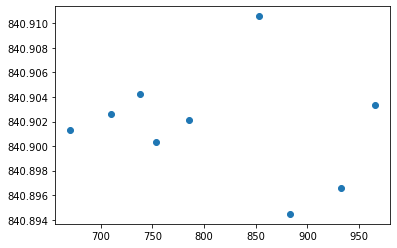

In [15]:
%matplotlib inline

# regression plot
y_pred = reg_model(X_test).detach()

plt.scatter(y_test, y_pred)
plt.show()



In [22]:
# bias b (offset of y-intercept)
reg_model.bias.item()

# weight (w)
print(reg_model.weight)

Parameter containing:
tensor([[268.4627, 237.6985]], requires_grad=True)


<AxesSubplot:>

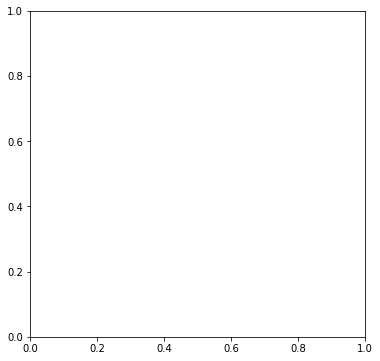

In [26]:
%matplotlib inline

# def plot_regression(features, yhat):
#   fig, ax = plt.subplots(figsize=dim)
#         plt.scatter(df[x].to_numpy(), df[y].to_numpy(), color=colordot, s=dotsize, alpha=valphadot, marker=markerdot,
#                     label='Observed data')
#         plt.plot(df[x].to_numpy(), df[yhat].to_numpy(), color=colorline, linewidth=linewidth, alpha=valphaline,
#                  label='Regression line')
#     return ax


